In [22]:
import pandas as pd
import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")
import seaborn as sns

날짜 데이터
- 배송시작일
- 배송완료일
- 주문일
이 있다. 형식이 제각각이다.

[pd.Series.dt.isocalendar](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.isocalendar.html)

pd.to_datetime(ser, format)
- ser : 날자 데이터 pd.Series
- format: 날짜 데이터 string의 [format](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)
> - %Y: Year with century as a decimal number.
> - %m: Month as a **zero-padded** decimal number.
> - %d:Day of the month as a **zero-padded** decimal number.

- 변환
> df1["시간col1(datetime)"] = pd.to_datetime(df1["시간col1"], format="문자열 형식")

- 사용
> - df1["주문연도"] = df1["주문일(datetime)"].dt.year
> - df1["주문월"] = df1["주문일(datetime)"].dt.month
> - 1년 52주 중 몇주차에 주문이 되었는가?
>> df1["주문주차"] = df1["주문일(datetime)"].dt.isocalendar().week
> - df1["주문요일"] = df1["주문일(datetime)"].dt.day_name()

- 연도별 분석
- 월별 분석
- 요일별 분석


### 예제

#### 요일별 주문량
- `sns.countplot(data=df1, x="주문요일")`

#### 주문일별 상품구매금액의 총합
> `sns.lineplot(data=df1, x="주문일(dt)", y="상품구매금액", estimator="sum")`

#### 일자별 주문수량
> `df1.pivot_table(index="주문일(dt)", values="수량", aggfunc="sum")`

#### 주문수량이 가장 많았던 일자 확인
- `df2 = df1.pivot_table(index="주문일(dt)", values="수량", aggfunc="sum")`
- `df2.sort_values(by="수량", ascending=False).head(1)`

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 0: invalid start byte
> encoding="cp949"

In [5]:
df1 = pd.read_csv("dataset/03_Delivery.csv", encoding="cp949")

In [6]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   결제수단    46749 non-null  object 
 1   배송번호    46749 non-null  object 
 2   배송시작일   46749 non-null  object 
 3   배송완료일   46749 non-null  object 
 4   상품구매금액  46749 non-null  int64  
 5   상품번호    46661 non-null  float64
 6   수량      46749 non-null  int64  
 7   주문경로    46749 non-null  object 
 8   주문일     46749 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [9]:
df1["주문일"]

0        20181227
1        20181229
2        20181230
3        20181231
4        20181231
           ...   
46744    20171229
46745    20171229
46746    20171230
46747    20171231
46748    20171231
Name: 주문일, Length: 46749, dtype: int64

In [12]:
df1["주문일(dt)"] = pd.to_datetime(df1["주문일"], format="%Y%m%d")

In [38]:
df1["주문연도"] = df1["주문일(dt)"].dt.year
df1["주문월"] = df1["주문일(dt)"].dt.month
df1["주문주차"] = df1["주문일(dt)"].dt.isocalendar().week
df1["주문요일"] = df1["주문일(dt)"].dt.day_name()

요일별 주문량
> 요일별 주문량의 count (상품주문금액 X)

<Axes: xlabel='주문요일', ylabel='count'>

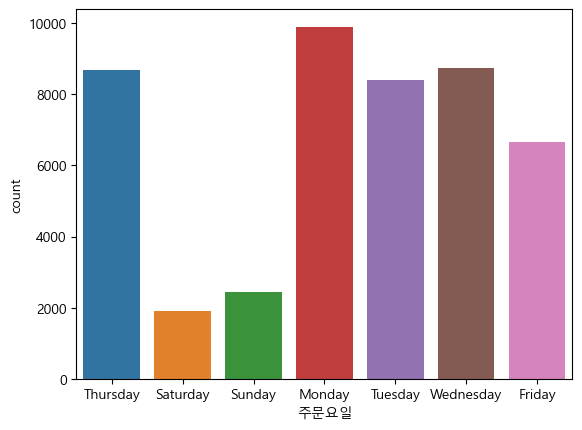

In [31]:
sns.countplot(data=df1, x="주문요일") 

<Axes: xlabel='주문일(dt)', ylabel='상품구매금액'>

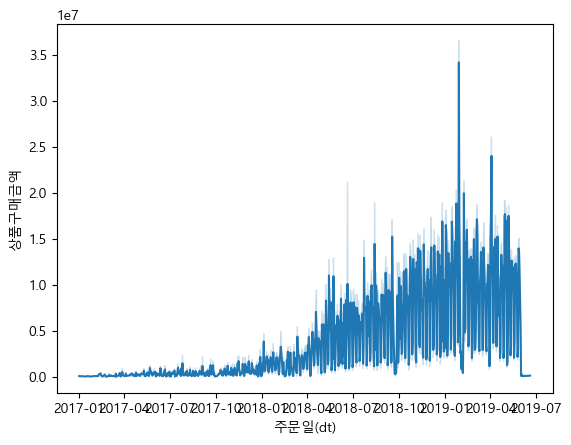

In [33]:
# 주문일별 상품구매금액의 총합
sns.lineplot(data=df1, x="주문일(dt)", y="상품구매금액", estimator="sum")

In [37]:
# 일자별 주문수량
df1.pivot_table(index="주문일(dt)", values="수량", aggfunc="sum")

,수량
주문일(dt),
2019-01-28,442
2019-04-03,417
2019-04-02,298
2018-11-12,295
2019-05-07,287
...,...
2017-06-03,1
2017-05-14,1
2017-05-13,1
